#### Importing the Dependancies

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

#### The 1D function chosen for this implementation

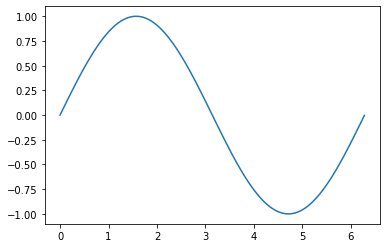

In [8]:
x = np.arange(0, 6.28, 0.0628)
y = np.sin(x)
plt.plot(x, y)
plt.show()

#### Splitting the data into Test and Train splits

In [63]:
# random.shuffle(x)
np.random.permutation(x)
train_data = x[0:70]
x_n = train_data/6.28
test_data = x[71:101]
xt_n = test_data/6.28

#### Training the CMAC

In [42]:
conv=[]
w_vector=np.zeros(35)
w_vector=np.append([0],w_vector)
w_vector=np.append(w_vector,[0])

error_thres = 0.2

before=current=after=None

while error_thres>-0.0001:
    
    for i in range(0,35):
        
        for j in range(0,len(train_data)):
            
            q = int(np.round(x_n[j]*35))
            
            if q in range(0,70,2):
                
                a = q-1
                b = q
                c = q+1
                before = w_vector[a]
                current = w_vector[b]
                after = w_vector[c]
                y_sum = (before+current+after)

                y_error = np.sin(x_n[j]*6.28)-y_sum
                y_error_corrected=(y_error/3)
                conv.append(y_error_corrected)

                w_vector[a]=(y_error_corrected)+(w_vector[a])
                w_vector[b]=(y_error_corrected)+(w_vector[b])
                w_vector[c]=(y_error_corrected)+(w_vector[c])

                
            elif q in range(1,71,2):
                
                a = q-1
                b = q
                c = q+1
                before = w_vector[a]*0.8
                current = w_vector[b]
                after = w_vector[c]*1.2
                y_sum = (before+current+after)

                y_error = np.sin(x_n[j]*6.28)-y_sum
#                 conv.append(y_error)
                y_error_corrected=(y_error/3)
                conv.append(y_error_corrected)

                w_vector[a]=(y_error_corrected)+(w_vector[a])
                w_vector[b]=(y_error_corrected)+(w_vector[b])
                w_vector[c]=(y_error_corrected)+(w_vector[c])
            
    error_thres=y_error

#### Checking the error convergence

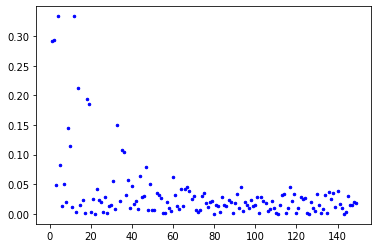

In [62]:
for k in range (1,150):
    plt.plot(k,abs(conv[k]),marker='.', markersize=5, color="blue")
plt.show()

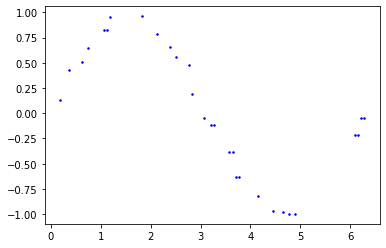

In [12]:
for k in range (1,len(test_data)):
    
    t = int(np.round(xt_n[k]*35))
    
    y_output=(w_vector[t-1]*0.8 + w_vector[t] + w_vector[t+1]*1.2)

    plt.plot(test_data[k], y_output,marker='.', markersize=3, color="blue")


plt.show()

#### Testing the CMAC (Plot is between actual curve vs output points)

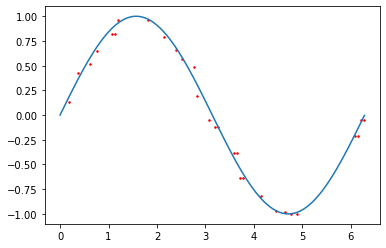

In [21]:
for k in range (1,len(test_data)):
    
    t = int(np.round(xt_n[k]*35))
    
    y_output=(w_vector[t-1]*0.8 + w_vector[t] + w_vector[t+1]*1.2)
    #print (y_output)

    plt.plot(test_data[k], y_output,marker='.', markersize=3, color="red")

xx = np.arange(0, 6.28, 0.0628)
yy = np.sin(xx)
plt.plot(xx, yy)
plt.show()